# Outlier Detection using Z-score method

# Author/Created by: Ajay Taneja

# Date: September - October 2022.

# Removal of outliers using Z-score method using the height-weight dataset of Kaggle(see refernces section for the link to the dataset)

In [26]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [27]:
# This data set of height and weight is from Kaggle (See reference section for the hyperlink to the dataset)
# The weight column is removed from the csv so that only the height column is retained
#Let us load the data set first


df = pd.read_csv("heights_kaggle.csv")
df.sample(10)

,gender,height
6097,Female,61.932352
8323,Female,66.284863
4603,Male,65.869253
9534,Female,65.489716
110,Male,69.292738
777,Male,68.317245
2041,Male,68.395164
7941,Female,62.834760
5992,Female,62.559495
6693,Female,62.805064


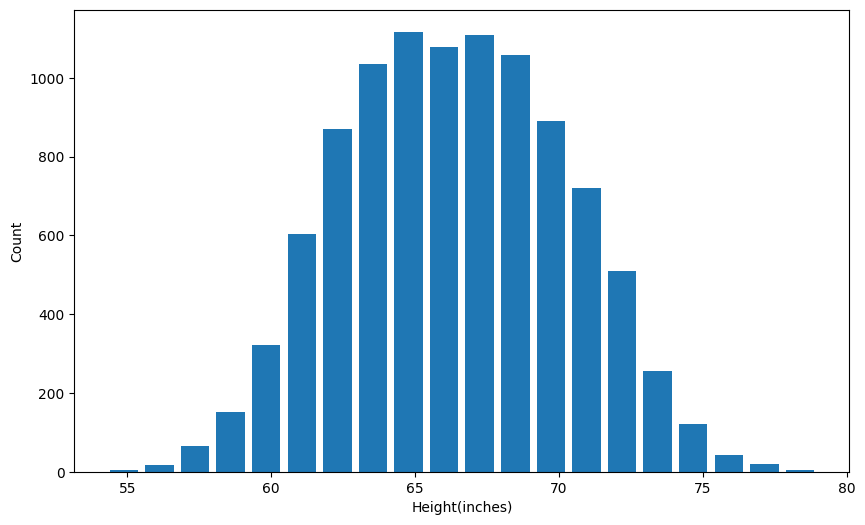

In [28]:
#Let us plot the histogram as we re going to use Z-score for outlier detection
#Histogram is graphical display of the feature and is displayed using bars
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

As you can see the number of samples for each bin/height. The y axis shows number of samples. It can be seen that for 
60 inch height we have around 380 samples, for 65 inch height we have more than 1000 sample and so on...
Let's plot a bell curve superimposing the plot
For plotting the bell curv we need the scipy module of python

In [29]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


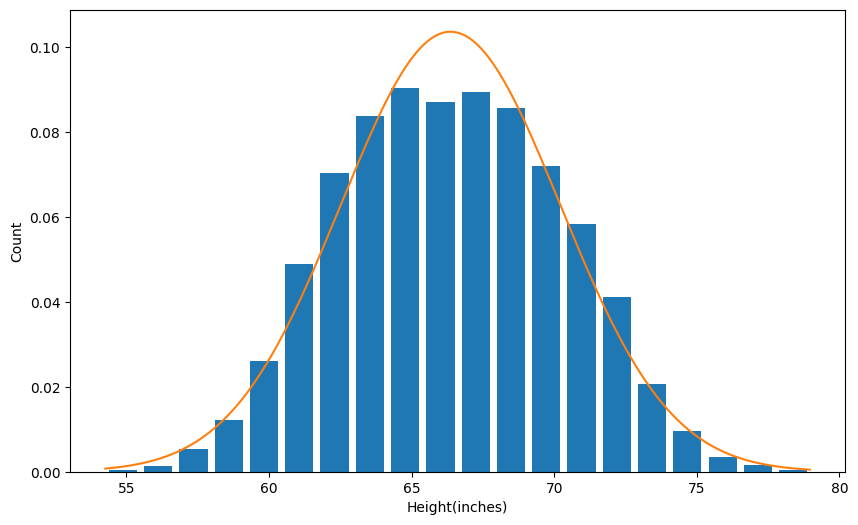

In [30]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=1)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))

In [31]:
df.height.mean()

66.367559754866

In [32]:
df.height.std()

3.847528120795573

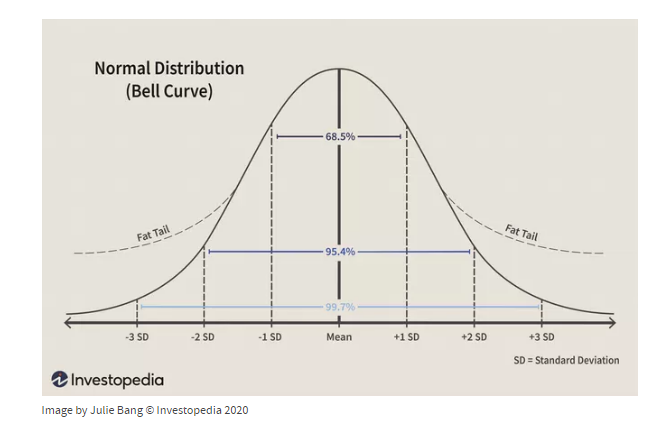

In [33]:
#Let us consider any data that is outside of 3 standard deviation as outliers

upper_limit = df.height.mean() + 3*df.height.std()
lower_limit = df.height.mean() - 3*df.height.std()
upper_limit, lower_limit

(77.91014411725271, 54.824975392479274)

In [34]:
df2 = df[(df.height > lower_limit) & (df.height < upper_limit)]
df2.sample(10)
df2.shape

(9993, 2)

In [35]:
#How many outliers did you remove?

no_of_outliers_removed = df.shape[0]- df2.shape[0]
no_of_outliers_removed

7

<b>Above we could have used "Z-score" instead</b>. Recalling the definition of Z-score:

Z-score quantifies the unusualness of an observation when your data follows a normal distribution. Z-scores are the number of standard deviations above and below the mean each value falls. A z-score of 2 indicates that an observation is 2 standard deviations above average whilst a Z-score of -2 indicates it is 2 standard deviations below the average.
Mathematically,

Z-score, is given by:

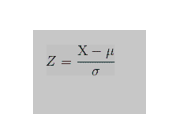
 
Percentile vs Z score:

It must be underscored that whilst the percentile uses the median as an average (50th percentile), Z-score uses the mean as an average. Thus, a Z-score of 0 represents a value equal to the mean. The farthest away a Z-score is from mean, the more unusual it is. 


<b>Note: Below we demonstrate how to remove outliers by using Z-score which essentially is same as using standard deviation! We are just demonstarting the same technique with differennt terminology</b>


In [36]:
#Let's form a new column in the dataframe called 'zscore'
df['zscore'] = (df.height - df.height.mean()) / (df.height.std())
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Let us remove the datapoints with Z-score greater than 3 or Z-score less than 3 - these data points may be considered as outliers (which is same as remving outliers with standard devaition +/-3

In [37]:
df2 = df[(df.zscore < 3) & (df.zscore > -3)]
df2.sample(10)

,gender,height,zscore
9237,Female,63.748094,-0.680818
4619,Male,66.327699,-0.010360
8717,Female,66.110981,-0.066687
1391,Male,74.406481,2.089373
5597,Female,65.548812,-0.212798
3363,Male,70.272582,1.014943
5461,Female,65.037607,-0.345664
182,Male,66.402250,0.009016
4050,Male,67.332566,0.250812
8038,Female,61.789044,-1.189989


In [40]:
#No of outliers removed
no_outliers_removed = df.shape[0] - df2.shape[0]
no_outliers_removed
#7 outliers have been removed

7

References:
1) Kaggles's Height-Weight Dataset: https://www.kaggle.com/datasets/mustafaali96/weight-height
2) Codebasics: https://youtu.be/KFuEAGR3HS4?list=PLeo1K3hjS3ut5olrDIeVXk9N3Q7mKhDxO
3) https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/2-mean-and-standard-deviation
4) https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/